In [1]:
import sys
sys.path.append('C:/Users/User/github/Anomaly-Detection')

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from hotellings_tsquare import *
plt.style.use(['ggplot'])

In [42]:
path = "C:/Users/User/github/data/TFTLCD/"
df4 = pd.read_csv(path + "TFT_EDA_ALL.csv", encoding = 'CP949') # 전체 EDA DATA


In [43]:
Tool1_time = df4[df4['TOOL_NAME'] == 'Tool1'][['TIME_STAMP']].reset_index()
Tool2_time = df4[df4['TOOL_NAME'] == 'Tool2'][['TIME_STAMP']].reset_index()
Tool3_time = df4[df4['TOOL_NAME'] == 'Tool3'][['TIME_STAMP']].reset_index()
Tool4_time = df4[df4['TOOL_NAME'] == 'Tool4'][['TIME_STAMP']].reset_index()

In [44]:
df_train = df4.iloc[1:2000]
df_test = df4.iloc[2000:]

In [45]:
Tool1_train = df_train[df_train['TOOL_NAME'] == 'Tool1']
Tool2_train = df_train[df_train['TOOL_NAME'] == 'Tool2']
Tool3_train = df_train[df_train['TOOL_NAME'] == 'Tool3']
Tool4_train = df_train[df_train['TOOL_NAME'] == 'Tool4']

Tool1_test = df_test[df_test['TOOL_NAME'] == 'Tool1']
Tool2_test = df_test[df_test['TOOL_NAME'] == 'Tool2']
Tool3_test = df_test[df_test['TOOL_NAME'] == 'Tool3']
Tool4_test = df_test[df_test['TOOL_NAME'] == 'Tool4']

In [46]:
print(len(Tool1_train))
print(len(Tool1_test))
print(len(Tool2_train))
print(len(Tool2_test))
print(len(Tool3_train))
print(len(Tool3_test))
print(len(Tool4_train))
print(len(Tool4_test))

636
636
398
398
574
574
391
392


In [47]:
T1_H = pd.DataFrame(hotellings_tsquare(Tool1_train.iloc[:,2:], Tool1_test.iloc[:,2:])) # 318에서 뜀
T2_H = pd.DataFrame(hotellings_tsquare(Tool2_train.iloc[:,2:], Tool2_test.iloc[:,2:])) # 199~200에서 뜀
T3_H = pd.DataFrame(hotellings_tsquare(Tool3_train.iloc[:,2:], Tool3_test.iloc[:,2:])) # 287에서 뜀
T4_H = pd.DataFrame(hotellings_tsquare(Tool4_train.iloc[:,2:], Tool4_test.iloc[:,2:])) # 196에서 뜀


In [48]:
t1 = bootstrap_limit(hotellings_tsquare(Tool1_train.iloc[:,2:], Tool1_train.iloc[:,2:])) #128.192
t2 = bootstrap_limit(hotellings_tsquare(Tool2_train.iloc[:,2:], Tool2_train.iloc[:,2:])) # 95.221
t3 = bootstrap_limit(hotellings_tsquare(Tool3_train.iloc[:,2:], Tool3_train.iloc[:,2:])) #111.278
t4 = bootstrap_limit(hotellings_tsquare(Tool4_train.iloc[:,2:], Tool4_train.iloc[:,2:])) #118.942

In [49]:
#df4.sort_values(by  = ['TIME_STAMP'], inplace=True, ignore_index=True)

plot1 = pd.concat([Tool1_time, T1_H], axis= 1,ignore_index=False).sort_values(by = ['TIME_STAMP'], ignore_index=True).dropna()
plot2 = pd.concat([Tool2_time, T2_H], axis= 1,ignore_index=False).sort_values(by = ['TIME_STAMP'], ignore_index=True).dropna()
plot3 = pd.concat([Tool3_time, T3_H], axis= 1,ignore_index=False).sort_values(by = ['TIME_STAMP'], ignore_index=True).dropna()
plot4 = pd.concat([Tool4_time, T4_H], axis= 1,ignore_index=False).sort_values(by = ['TIME_STAMP'], ignore_index=True).dropna()

In [50]:
x1 = np.ravel(plot1[['TIME_STAMP']])
y1 = plot1[[0]]
x2 = np.ravel(plot2[['TIME_STAMP']])
y2 = plot2[[0]]
x3 = np.ravel(plot3[['TIME_STAMP']])
y3 = plot3[[0]]
x4 = np.ravel(plot4[['TIME_STAMP']])
y4 = plot4[[0]]

In [51]:
T1_H.count

<bound method DataFrame.count of               0
0     45.262655
1     35.175290
2     41.272132
3     14.702689
4     29.393601
..          ...
631  301.403766
632  107.633862
633  141.439114
634   76.536311
635  257.022985

[636 rows x 1 columns]>

In [52]:
print(len(T1_H.loc[T1_H[0] > t1]))
print(len(T2_H.loc[T2_H[0] > t2]))
print(len(T3_H.loc[T3_H[0] > t3]))
print(len(T4_H.loc[T4_H[0] > t4]))

259
191
245
163


In [53]:
print(len(plot1.loc[plot1[0] > t1]))
print(len(plot2.loc[plot2[0] > t2]))
print(len(plot3.loc[plot3[0] > t3]))
print(len(plot4.loc[plot4[0] > t4]))

259
191
245
163


<Figure size 640x480 with 0 Axes>

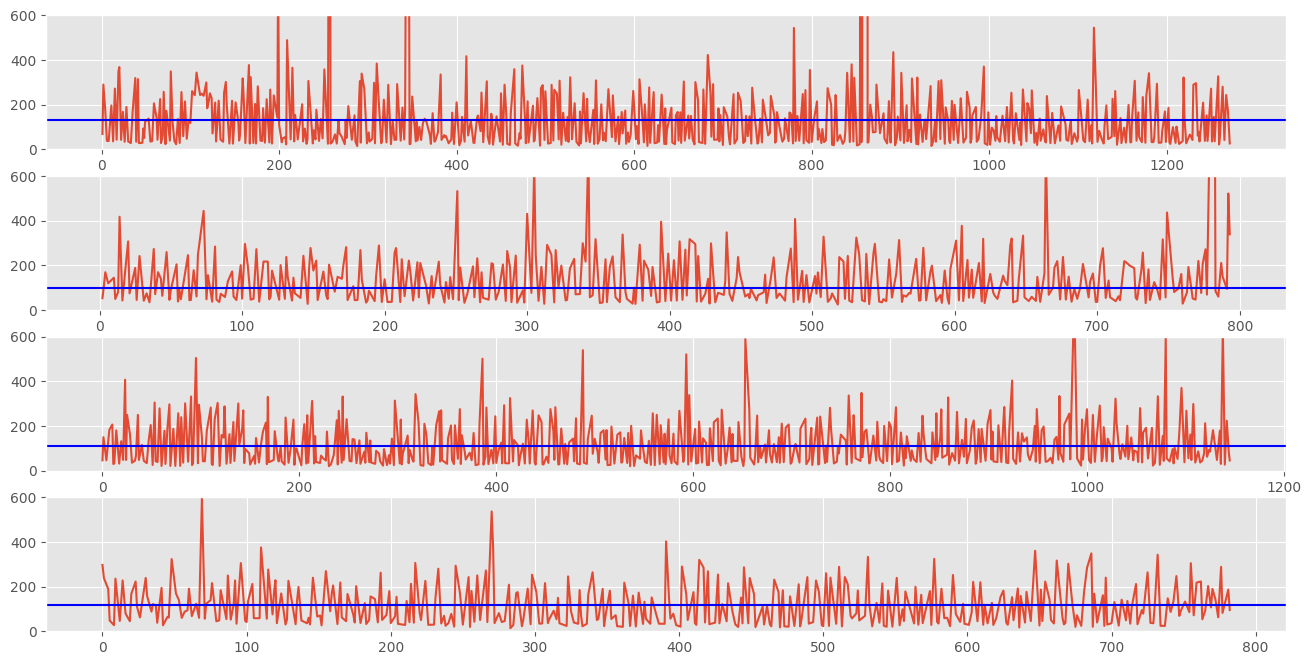

In [22]:
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.figure(figsize = (16,8))

plt.subplot(4,1,1)
plt.ylim([0,600])
plt.plot(y1)
plt.axhline(y=t1, color = 'blue')

plt.subplot(4,1,2)
plt.ylim([0,600])
plt.plot(y2)
plt.axhline(y=t2, color = 'blue')

plt.subplot(4,1,3)
plt.ylim([0,600])
plt.plot(y3)
plt.axhline(y=t3, color = 'blue')

plt.subplot(4,1,4)
plt.ylim([0,600])
plt.plot(y4)
plt.axhline(y=t4, color = 'blue')
plt.show()



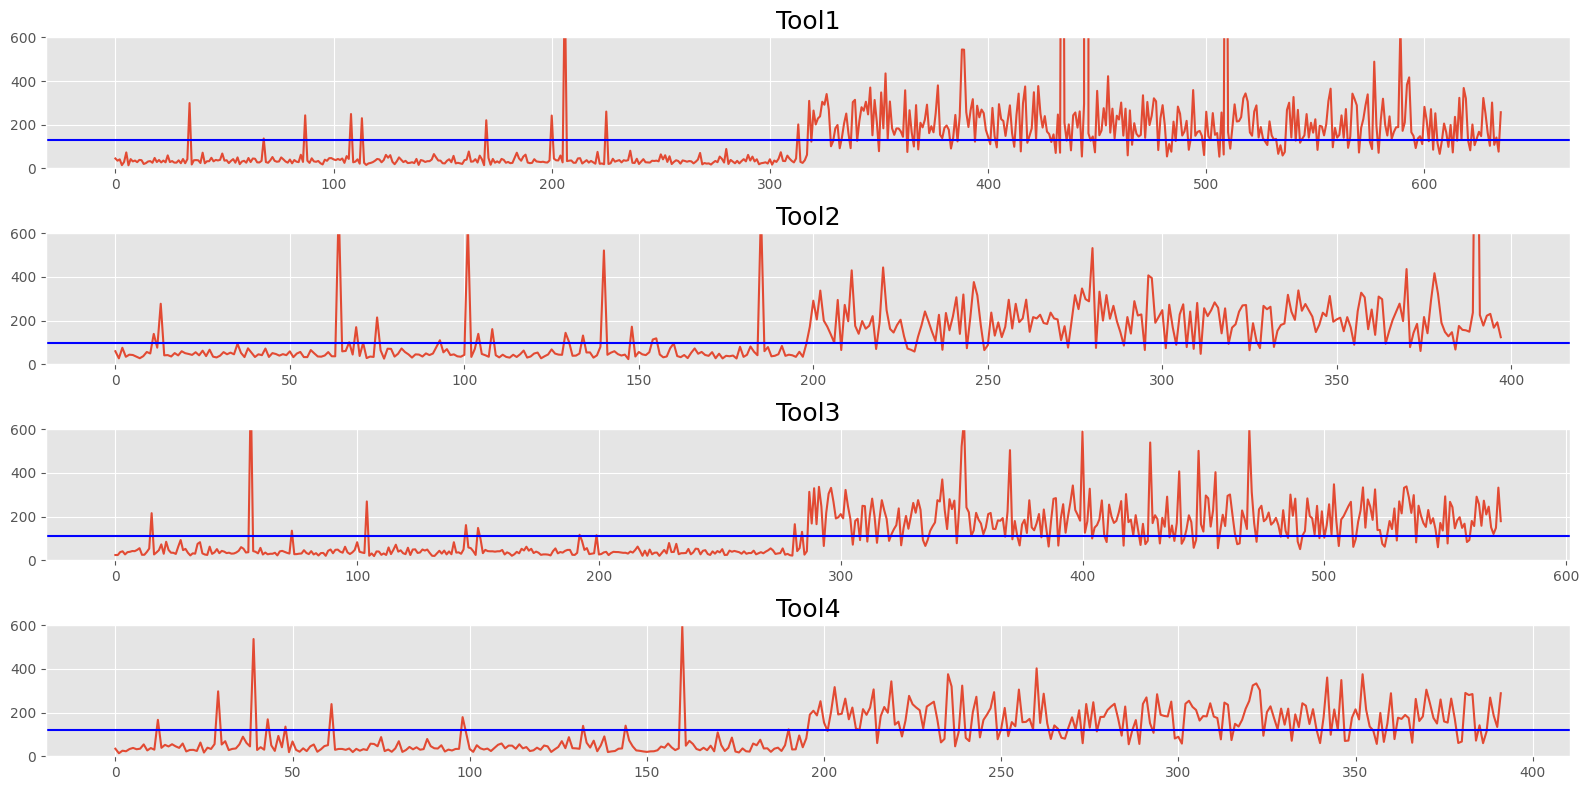

In [78]:

plt.figure(figsize = (16,8))

plt.subplot(4,1,1)
plt.ylim(0,600)
plt.plot(T1_H)
plt.title('Tool1', fontsize = 18)
plt.axhline(y=t1, color = 'blue')

plt.subplot(4,1,2)
plt.ylim([0,600])
plt.plot(T2_H)
plt.title('Tool2', fontsize = 18)
plt.axhline(y=t2, color = 'blue')

plt.subplot(4,1,3)
plt.ylim([0,600])
plt.plot(T3_H)
plt.title('Tool3', fontsize = 18)
plt.axhline(y=t3, color = 'blue')

plt.subplot(4,1,4)
plt.ylim([0,600])
plt.plot(T4_H)
plt.title('Tool4', fontsize = 18)
plt.axhline(y=t4, color = 'blue')

plt.tight_layout(h_pad=1, w_pad=1)
plt.show()


In [9]:
Tool1 = pd.concat([Tool1_test, Tool1_train],axis=0)
Tool2 = pd.concat([Tool2_test, Tool2_train],axis=0)
Tool3 = pd.concat([Tool3_test, Tool3_train],axis=0)
Tool4 = pd.concat([Tool4_test, Tool4_train],axis=0)


In [10]:
#T1_H.to_csv("C:/Users/User/github/Rstudio/Project/Tool1_hotelling.csv", index= False)
#T2_H.to_csv("C:/Users/User/github/Rstudio/Project/Tool2_hotelling.csv", index= False)
#T3_H.to_csv("C:/Users/User/github/Rstudio/Project/Tool3_hotelling.csv", index= False)
#T4_H.to_csv("C:/Users/User/github/Rstudio/Project/Tool4_hotelling.csv", index= False)

#Tool1.to_csv("C:/Users/User/github/Rstudio/Project/Tool1_all.csv", index= False)
#Tool2.to_csv("C:/Users/User/github/Rstudio/Project/Tool2_all.csv", index= False)
#Tool3.to_csv("C:/Users/User/github/Rstudio/Project/Tool3_all.csv", index= False)
#Tool4.to_csv("C:/Users/User/github/Rstudio/Project/Tool4_all.csv", index= False)